In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Data Correlation
import matplotlib.pyplot as plt
import seaborn as sns

import numpy

In [2]:
cookie_data = pd.read_csv('./TU/Cookie.csv', sep=';', skiprows=[1], dtype='string')
cookie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252254 entries, 0 to 252253
Columns: 109 entries, userid_1 to lead_model2
dtypes: string(109)
memory usage: 209.8 MB


## 1.1 Identify Columns With NAs

We want to receive a list of all columns, that contain at least one NA value. We will be provided with the absolute number of NAs per column and the relative proportion of NAs.

In [4]:
NA_overview = cookie_data.isna().sum()
cookie_columns = cookie_data.columns
entries = len(cookie_data)

list_of_NA_columns = pd.DataFrame(columns=['col name', 'absolute # of NAs', 'proportional # of NAs'])

for i in range(len(cookie_data.columns)):
    # Only include columns with at least 1 NA value
    if NA_overview[i] > 0:
        list_of_NA_columns = list_of_NA_columns.append({
            'col name': cookie_columns[i],
            'absolute # of NAs': NA_overview[i],
            'proportional # of NAs': NA_overview[i]*100/entries
        }, ignore_index=True)


print(list_of_NA_columns.to_string())
#print("Length: " + str(len(list_of_NA_columns)))

                           col name absolute # of NAs  proportional # of NAs
0                    conf_start_iv4            241638              95.791543
1                conf_start_gulfvar            251240              99.598024
2                  conf_start_upper            247899              98.273566
3                 conf_start_polnew            251246              99.600403
4                    conf_start_pol            247885              98.268016
5               conf_start_crossing            249372              98.857501
6                    conf_start_iv3            243303              96.451592
7                   conf_start_golf            241870              95.883514
8                   conf_start_croc            246929              97.889032
9                   conf_start_tour            250088              99.141342
10                  conf_start_tiga            250531              99.316958
11                  conf_start_pass            246603              97.759798

100.0    47
0.0      35
90.0      9
40.0      2
80.0      2
50.0      2
Name: proportional # of NAs, dtype: int64


Text(0, 0.5, 'Number of occurrences')

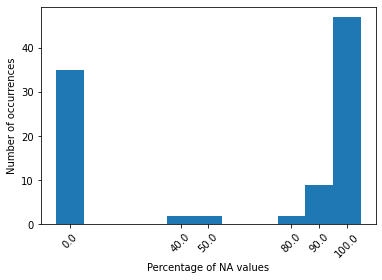

In [38]:
y = list_of_NA_columns['proportional # of NAs'].round(decimals=-1)
y = y.value_counts()
print(y)
plt.bar(y.index, y.values, width=10.0)
plt.xticks(ticks=y.index, labels=y.index, rotation=45)
plt.xlabel('Percentage of NA values')
plt.ylabel('Number of occurrences')

In [6]:
NA_rate_below_10 = pd.DataFrame()
NA_rate_above_90 = pd.DataFrame()

for idx, row in list_of_NA_columns.iterrows():
    if row['proportional # of NAs'] < 10:
        NA_rate_below_10 = NA_rate_below_10.append(row)
    elif row['proportional # of NAs'] > 90:
        NA_rate_above_90 = NA_rate_above_90.append(row)
        

print("Columns with below 10% NA values: " + str(len(NA_rate_below_10)))
print("Columns with above 90% NA values: " + str(len(NA_rate_above_90)))
print('')
print("NA_rate_below_10")
print(NA_rate_below_10.to_string())
print('')
print("NA_rate_above_90")
print(NA_rate_above_90.to_string())

Columns with below 10% NA values: 35
Columns with above 90% NA values: 56

NA_rate_below_10
                           col name  absolute # of NAs  proportional # of NAs
32      page_connectivity_frequency             3785.0               1.500472
33      page_configurator_frequency             3785.0               1.500472
34         page_weconnect_frequency             3785.0               1.500472
35        page_appconnect_frequency             3785.0               1.500472
36          page_formpage_frequency             3785.0               1.500472
37          page_wecharge_frequency             3785.0               1.500472
38  page_formofferrequest_frequency             3785.0               1.500472
39        page_aftersales_frequency             3785.0               1.500472
40     page_formtestdrive_frequency             3785.0               1.500472
41        page_wemobility_frequency             3785.0               1.500472
42       page_connectivity_activity             37

## "conf_start_..." and "conf_end..."

We take a look at the values, the columns "conf_start_..." and "conf_end_..." contain.

In [39]:
all_parts = []
for i in range(8,40):
    part = cookie_data.iloc[0:,i]
    all_parts.append(part.value_counts())

all_parts_df = pd.concat(all_parts, axis=1)
all_parts_df.fillna(0, inplace=True)

accumulated_values = all_parts_df.sum(axis=1)
print(accumulated_values)

1      78353.0
2      15548.0
4       9267.0
3       5792.0
5       2480.0
        ...   
117        1.0
256        1.0
193        1.0
138        1.0
203        1.0
Length: 172, dtype: float64

We can see, that not a single zero is contained in any of the columns starting with "conf_start_..." or "conf_end_..."

## "page_..."

In [8]:
all_parts = []
for i in range(40,72):
    part = cookie_data.iloc[0:,i]
    all_parts.append(part.value_counts())

all_parts = pd.concat(all_parts, axis=1)
all_parts.fillna(0, inplace=True)

#print(all_parts)
#print(all_parts.hist(figsize=(30,10)))

accumulated_values = all_parts.sum(axis=1)
print(accumulated_values)

0       7608110.0
1         74918.0
2         24793.0
3         18016.0
4         15278.0
          ...    
1405          1.0
5433          1.0
1564          1.0
3562          1.0
3587          1.0
Length: 1526, dtype: float64


We see, that the zero is present in these columns. We can therefore not assume, that zero is represented by NA values. A value to replace all NA values with is not obvious here.

In [19]:
print(NA_rate_below_10['col name'])
print(len(NA_rate_below_10['col name']))
print("")

# remove "predictions_product1", "predictions_score1", and "lead_model2" from the list
page_col_names = NA_rate_below_10['col name'].iloc[0:-3]

print(page_col_names)
print(len(page_col_names))

32        page_connectivity_frequency
33        page_configurator_frequency
34           page_weconnect_frequency
35          page_appconnect_frequency
36            page_formpage_frequency
37            page_wecharge_frequency
38    page_formofferrequest_frequency
39          page_aftersales_frequency
40       page_formtestdrive_frequency
41          page_wemobility_frequency
42         page_connectivity_activity
43         page_configurator_activity
44            page_weconnect_activity
45           page_appconnect_activity
46             page_formpage_activity
47             page_wecharge_activity
48          page_formcontact_activity
49     page_formofferrequest_activity
50           page_aftersales_activity
51        page_formtestdrive_activity
52           page_wemobility_activity
53            page_connectivity_ratio
54            page_configurator_ratio
55               page_weconnect_ratio
56              page_appconnect_ratio
57                page_formpage_ratio
58          

In [20]:
cookie_data_copy = cookie_data.copy().dropna(subset=page_col_names)

print("Original Data:", cookie_data.shape)
print("Modified Data:", cookie_data_copy.shape)

Original Data: (252254, 109)
Modified Data: (248469, 109)


We can see, that we would have to drop 3785 rows do eliminate all NA values from the "page_..." columns. This would constitute a loss of more than 1% of the overall data set and is therefore perceived not acceptable.

# Distribution of Target Variables

In [10]:
# we need to drop the NA values in the "lead_model2" column to make the counting of values work.
cookie_data = cookie_data.dropna(subset=['lead_model2'])

unique0, counts0 = numpy.unique(cookie_data['lead_general'], return_counts=True)
dist_lg = pd.DataFrame(data={'lead_general': counts0}, index=unique0)

unique1, counts1 = numpy.unique(cookie_data['lead_model1'], return_counts=True)
dist_1 = pd.DataFrame(data={'lead_model1': counts1}, index=unique1)

unique2, counts2 = numpy.unique(cookie_data['lead_model2'], return_counts=True)
dist_2 = pd.DataFrame(data={'lead_model2': counts2}, index=unique2)

In [20]:
dist_all = pd.concat([dist_lg, dist_1, dist_2], axis=1, ignore_index=False)
dist_all

,lead_general,lead_model1,lead_model2
0,248887.0,250013.0,252045.0
1,3329.0,NaN,NaN
Amarok,NaN,1.0,NaN
Art,NaN,38.0,1.0
Art R,NaN,4.0,1.0
Art R-Line Performance,NaN,1.0,NaN
Beetle Cabrio,NaN,6.0,NaN
Caddy,NaN,6.0,1.0
Croc,NaN,127.0,8.0
Croc IQ.Drive,NaN,5.0,2.0
